In [12]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import uniform

In [2]:
RANDOM_STATE = 31415
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
dataset = seaborn.load_dataset('titanic')
# I want only the age column, but I don't want to deal with missing values
ages = dataset.age.dropna()

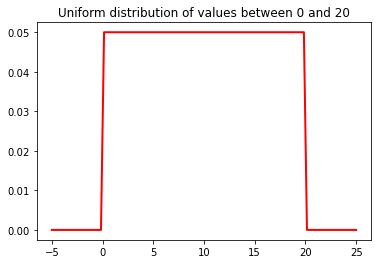

In [5]:
uniform_dist = uniform(loc = 0, scale = 20)
uniform_dist.rvs(size = 10, random_state = RANDOM_STATE)
x = np.linspace(-5, 25, 100)
_, ax = plt.subplots(1, 1)
ax.plot(x, uniform_dist.pdf(x), 'r-', lw = 2)
plt.title('Uniform distribution of values between 0 and 20')
plt.show()

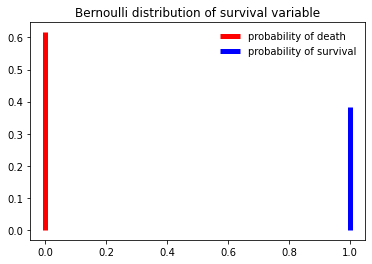

In [6]:
from scipy.stats import bernoulli
countSurvived = dataset[dataset.survived == 1].survived.count()
countAll = dataset.survived.count()
survived_dist = bernoulli(countSurvived / countAll)
# the given value is the probability of outcome 1 (survival) (let's call it p). # The probability of the opposite outcome (0 - death) is 1 - p.
_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, survived_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of death")
ax.vlines(1, 0, survived_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of survival")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of survival variable")
plt.show()

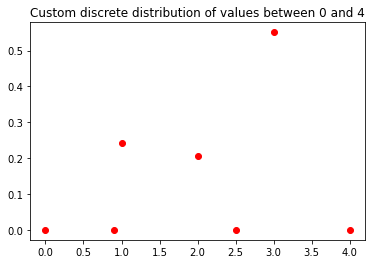

In [7]:
from scipy.stats import rv_discrete
pclass_probability = pd.DataFrame({'probability': dataset.groupby(by = "pclass", as_index=False).size() / dataset.pclass.count()}).reset_index()
values = pclass_probability.pclass
probabilities = pclass_probability.probability
custom_discrete_dist = rv_discrete(values=(values, probabilities))
x = [0, 0.9, 1, 2, 2.5, 3, 4]
_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discrete_dist.pmf(x), 'ro', lw=2)
plt.title('Custom discrete distribution of values between 0 and 4')
plt.show()


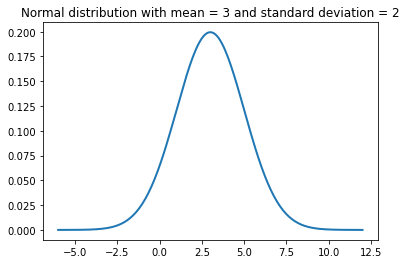

In [8]:
from scipy.stats import norm
mean = 3
standard_deviation = 2
normal_distribution = norm(loc = mean, scale = standard_deviation)
x = np.linspace(-6, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, normal_distribution.pdf(x), '-', lw=2)
plt.title('Normal distribution with mean = 3 and standard deviation = 2')
plt.show()

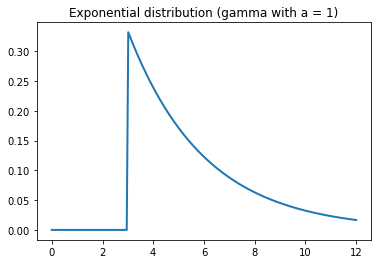

In [9]:
from scipy.stats import gamma
gamma_distribution = gamma(loc = 3, scale = 3, a = 1)
x = np.linspace(0, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_distribution.pdf(x), '-', lw=2)
plt.title('Exponential distribution (gamma with a = 1)')
plt.show()

In [17]:
def fit_and_plot(dist):
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    _, ax = plt.subplots(1, 1)
    plt.hist(ages, bins = 80, range=(0, 80))
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

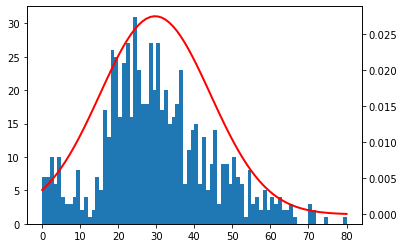

In [23]:
from scipy.stats import kstest
dist, loc, scale, arg = fit_and_plot(scipy.stats.norm)
d, pvalue = kstest(ages.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")

In [27]:
def fit_and_plot_cdf(dist):
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    _, ax = plt.subplots(1, 1)
    counts, bin_edges = np.histogram(ages, bins=80, normed=True)
    cdf = np.cumsum(counts)
    plt.plot(bin_edges[1:], cdf)
    ax2 = ax.twinx()
    ax2.plot(x, dist.cdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

In [25]:
_90_conf_interval = 3.29
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)
number_of_simulations = 1000000
maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)
data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level

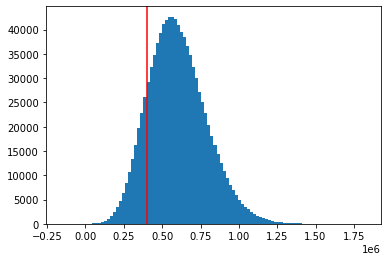

In [26]:
plt.hist(data.total_savings, bins = 100)
plt.axvline(x = 400000, c = "r")
plt.show()

In [22]:
data[data["total_savings"] < 400000].count()["total_savings"] / 1000000

0.140566